In [10]:
# AGENDA FOR TONIGHT
# Extract Stats features
# Make a list of relevant features
# Try PCA
# Try Clustering

In [135]:
import json
import pandas as pd
import matplotlib

import prince

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [44]:
with open('games_one_hot.json') as json_file:
    data = json.load(json_file)

In [45]:
df = pd.DataFrame(data)

In [46]:
df.head(2)

,id,name,stats,image,thumbnail,artists,designers,year,description,categories,...,mechanics_Turn Order: Stat-Based,mechanics_Variable Phase Order,mechanics_Variable Player Powers,mechanics_Variable Setup,mechanics_Victory Points as a Resource,mechanics_Voting,mechanics_Worker Placement,mechanics_Worker Placement with Dice Workers,"mechanics_Worker Placement, Different Worker Types",mechanics_Zone of Control
0,174430,Gloomhaven,"{'usersrated': 34855, 'average': 8.8311, 'baye...",https://cf.geekdo-images.com/original/img/lDN3...,https://cf.geekdo-images.com/thumb/img/e7GyV4P...,"[Alexandr Elichev, Josh T. McDowell, Alvaro Ne...",[Isaac Childres],2017,Gloomhaven is a game of Euro-inspired tactica...,"[Adventure, Exploration, Fantasy, Fighting, Mi...",...,0,0,1,0,0,0,0,0,0,0
1,161936,Pandemic Legacy: Season 1,"{'usersrated': 36949, 'average': 8.62291, 'bay...",https://cf.geekdo-images.com/original/img/P_Sw...,https://cf.geekdo-images.com/thumb/img/WI5NmPd...,[Chris Quilliams],"[Rob Daviau, Matt Leacock]",2015,Pandemic Legacy is a co-operative campaign gam...,"[Environmental, Medical]",...,0,0,1,0,0,0,0,0,0,0


In [47]:
gloomhaven['stats'][0]

{'usersrated': 34855,
 'average': 8.8311,
 'bayesaverage': 8.57594,
 'stddev': 1.60889,
 'median': 0.0,
 'owned': 56031,
 'trading': 347,
 'wanting': 1417,
 'wishing': 14655,
 'numcomments': 6553,
 'numweights': 1497,
 'averageweight': 3.827,
 'ranks': [{'id': '1',
   'name': 'boardgame',
   'friendlyname': 'Board Game Rank',
   'value': 1},
  {'id': '5496',
   'name': 'thematic',
   'friendlyname': 'Thematic Rank',
   'value': 1},
  {'id': '5497',
   'name': 'strategygames',
   'friendlyname': 'Strategy Game Rank',
   'value': 1}]}

In [49]:
df['number_of_user_ratings'] = df.apply(lambda row: row['stats']['usersrated'], axis=1)
df['average_user_rating'] = df.apply(lambda row: row['stats']['average'], axis=1)
df['number_of_user_weight_ratings'] = df.apply(lambda row: row['stats']['numweights'], axis=1)
df['average_user_weight_rating'] = df.apply(lambda row: row['stats']['averageweight'], axis=1)
df['bayes_average'] = df.apply(lambda row: row['stats']['bayesaverage'], axis=1)
df['number_of_users_own'] = df.apply(lambda row: row['stats']['owned'], axis=1)
df.head()

,id,name,stats,image,thumbnail,artists,designers,year,description,categories,...,mechanics_Worker Placement,mechanics_Worker Placement with Dice Workers,"mechanics_Worker Placement, Different Worker Types",mechanics_Zone of Control,number_of_user_ratings,average_user_rating,number_of_user_weight_ratings,average_user_weight_rating,bayes_average,number_of_users_own
0,174430,Gloomhaven,"{'usersrated': 34855, 'average': 8.8311, 'baye...",https://cf.geekdo-images.com/original/img/lDN3...,https://cf.geekdo-images.com/thumb/img/e7GyV4P...,"[Alexandr Elichev, Josh T. McDowell, Alvaro Ne...",[Isaac Childres],2017,Gloomhaven is a game of Euro-inspired tactica...,"[Adventure, Exploration, Fantasy, Fighting, Mi...",...,0,0,0,0,34855,8.83110,1497,3.8270,8.57594,56031
1,161936,Pandemic Legacy: Season 1,"{'usersrated': 36949, 'average': 8.62291, 'bay...",https://cf.geekdo-images.com/original/img/P_Sw...,https://cf.geekdo-images.com/thumb/img/WI5NmPd...,[Chris Quilliams],"[Rob Daviau, Matt Leacock]",2015,Pandemic Legacy is a co-operative campaign gam...,"[Environmental, Medical]",...,0,0,0,0,36949,8.62291,1034,2.8288,8.47129,58562
2,182028,Through the Ages: A New Story of Civilization,"{'usersrated': 19929, 'average': 8.46877, 'bay...",https://cf.geekdo-images.com/original/img/1d2h...,https://cf.geekdo-images.com/thumb/img/Ohqc2KT...,"[Filip Murmak, Radim Pech, Jakub Politzer, Mil...",[Vlaada Chvátil],2015,Through the Ages: A New Story of Civilization ...,"[Card Game, Civilization, Economic]",...,0,0,0,0,19929,8.46877,980,4.3969,8.22085,23599
3,167791,Terraforming Mars,"{'usersrated': 53758, 'average': 8.4267, 'baye...",https://cf.geekdo-images.com/original/img/o8z_...,https://cf.geekdo-images.com/thumb/img/yFqQ569...,[Isaac Fryxelius],[Jacob Fryxelius],2016,"In the 2400s, mankind begins to terraform the ...","[Economic, Environmental, Industry / Manufactu...",...,0,0,0,0,53758,8.42670,2142,3.2367,8.27617,70678
4,12333,Twilight Struggle,"{'usersrated': 37980, 'average': 8.30511, 'bay...",https://cf.geekdo-images.com/original/img/ZPnn...,https://cf.geekdo-images.com/thumb/img/mEmeJrI...,"[Viktor Csete, Rodger B. MacGowan, Chechu Niet...","[Ananda Gupta, Jason Matthews]",2005,"""Now the trumpet summons us again, not as a ca...","[Modern Warfare, Political, Wargame]",...,0,0,0,0,37980,8.30511,3421,3.5750,8.15264,52214


# Finished extracting data from json -> Moving to Features only to try PCA & KMeans

In [72]:
features_df = df.drop(['name','stats', 'image', 'thumbnail', 'artists', 'publishers', 'designers', 'description', 'categories', 'mechanics'], axis=1)
features_df.head()

,id,year,min_age,categories_Abstract Strategy,categories_Action / Dexterity,categories_Adventure,categories_Age of Reason,categories_American Civil War,categories_American Indian Wars,categories_American Revolutionary War,...,mechanics_Worker Placement,mechanics_Worker Placement with Dice Workers,"mechanics_Worker Placement, Different Worker Types",mechanics_Zone of Control,number_of_user_ratings,average_user_rating,number_of_user_weight_ratings,average_user_weight_rating,bayes_average,number_of_users_own
0,174430,2017,12,0,0,1,0,0,0,0,...,0,0,0,0,34855,8.83110,1497,3.8270,8.57594,56031
1,161936,2015,13,0,0,0,0,0,0,0,...,0,0,0,0,36949,8.62291,1034,2.8288,8.47129,58562
2,182028,2015,14,0,0,0,0,0,0,0,...,0,0,0,0,19929,8.46877,980,4.3969,8.22085,23599
3,167791,2016,12,0,0,0,0,0,0,0,...,0,0,0,0,53758,8.42670,2142,3.2367,8.27617,70678
4,12333,2005,13,0,0,0,0,0,0,0,...,0,0,0,0,37980,8.30511,3421,3.5750,8.15264,52214


In [81]:
# Bringing the last 5 columns to the left for visual appeal
cols = features_df.columns.tolist()

In [84]:
# Need to do some pesky reordering of column names
lst = []
lst.append(cols[0])
lst2 = []; lst2.append(cols[-1])
cols = lst + cols[-6:-1] + lst2 + cols[1:-6]

In [86]:
features_df = features_df[cols]

In [87]:
features_df.head(3)

,id,number_of_user_ratings,average_user_rating,number_of_user_weight_ratings,average_user_weight_rating,bayes_average,number_of_users_own,year,min_age,categories_Abstract Strategy,...,mechanics_Turn Order: Stat-Based,mechanics_Variable Phase Order,mechanics_Variable Player Powers,mechanics_Variable Setup,mechanics_Victory Points as a Resource,mechanics_Voting,mechanics_Worker Placement,mechanics_Worker Placement with Dice Workers,"mechanics_Worker Placement, Different Worker Types",mechanics_Zone of Control
0,174430,34855,8.83110,1497,3.8270,8.57594,56031,2017,12,0,...,0,0,1,0,0,0,0,0,0,0
1,161936,36949,8.62291,1034,2.8288,8.47129,58562,2015,13,0,...,0,0,1,0,0,0,0,0,0,0
2,182028,19929,8.46877,980,4.3969,8.22085,23599,2015,14,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
# Maybe I need features without the id
features_df = features_df.drop('id', axis=1)
features_df.head(3)

,number_of_user_ratings,average_user_rating,number_of_user_weight_ratings,average_user_weight_rating,bayes_average,number_of_users_own,year,min_age,categories_Abstract Strategy,categories_Action / Dexterity,...,mechanics_Turn Order: Stat-Based,mechanics_Variable Phase Order,mechanics_Variable Player Powers,mechanics_Variable Setup,mechanics_Victory Points as a Resource,mechanics_Voting,mechanics_Worker Placement,mechanics_Worker Placement with Dice Workers,"mechanics_Worker Placement, Different Worker Types",mechanics_Zone of Control
0,34855,8.83110,1497,3.8270,8.57594,56031,2017,12,0,0,...,0,0,1,0,0,0,0,0,0,0
1,36949,8.62291,1034,2.8288,8.47129,58562,2015,13,0,0,...,0,0,1,0,0,0,0,0,0,0
2,19929,8.46877,980,4.3969,8.22085,23599,2015,14,0,0,...,0,0,0,0,0,0,0,0,0,0


# Try PCA

In [103]:
# first I need to standardize my data!
standardized_features = StandardScaler().fit_transform(features_df)

array([[ 9.38013671,  2.74220735,  6.38215644, ..., -0.03909438,
        -0.03827003, -0.06638293],
       [ 9.9593565 ,  2.50783374,  4.32613998, ..., -0.03909438,
        -0.03827003, -0.06638293],
       [ 5.25146692,  2.33430788,  4.08634541, ..., -0.03909438,
        -0.03827003, -0.06638293],
       ...,
       [ 0.76126883, -3.61109724,  1.08003194, ..., -0.03909438,
        -0.03827003, -0.06638293],
       [ 0.68603111, -3.99916067,  0.97789721, ..., -0.03909438,
        -0.03827003, -0.06638293],
       [ 0.57704707, -4.20246309,  1.27986075, ..., -0.03909438,
        -0.03827003, -0.06638293]])

In [105]:
# Try PCA with 2 components
seed = 28
pca = PCA(n_components=2, random_state=seed)

In [106]:
principal_components = pca.fit_transform(standardized_features)

In [109]:
principal_df = pd.DataFrame(data=principal_components, columns = ['pc1', 'pc2'])

In [110]:
principal_df

,pc1,pc2
0,18.996299,4.727358
1,12.655769,5.796987
2,12.218003,4.777187
3,24.198041,9.785479
4,19.853454,2.278875
...,...,...
15722,-2.595430,0.119969
15723,-4.564361,2.308055
15724,-3.608051,1.343592
15725,-4.392331,1.379903


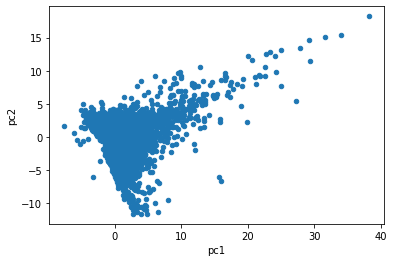

In [114]:
principal_df.plot.scatter(x='pc1', y='pc2')

# Try to drop Publish Year, see what happens

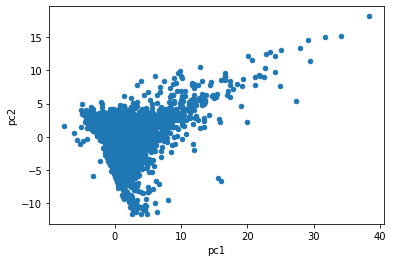

In [122]:
# features_df = features_df.drop('year', axis=1)
standardized_features = StandardScaler().fit_transform(features_df)
seed = 28
pca = PCA(n_components=2, random_state=seed)
principal_components = pca.fit_transform(standardized_features)
principal_df = pd.DataFrame(data=principal_components, columns = ['pc1', 'pc2'])
principal_df.plot.scatter(x='pc1', y='pc2')

In [124]:
# A very small % of the variance is explained with just two factors (which makes sense, we have ~ 200)
pca.explained_variance_ratio_
print(sum(pca.explained_variance_ratio_))

0.036813814606111384


Not much changed when we dropped Year

# Unlimited number of components

In [125]:
# Not limiting the number of components, just specifying the amount of variance I want
variance_explained = .9

standardized_features = StandardScaler().fit_transform(features_df)
seed = 28
pca = PCA(variance_explained, random_state=seed)
principal_components = pca.fit_transform(standardized_features)

In [128]:
features_df.shape

(15727, 272)

In [127]:
# It appears we shaved off 57 out of 272 features and lost only 10% of variance
pca.n_components_

215

# Try PCA w/ 2 components just on numberic variables

In [149]:
list(features_df.columns)[:7]

['number_of_user_ratings',
 'average_user_rating',
 'number_of_user_weight_ratings',
 'average_user_weight_rating',
 'bayes_average',
 'number_of_users_own',
 'min_age']

In [150]:
numeric_features_df = features_df[list(features_df.columns)[:7]]
numeric_features_df.head(3)

,number_of_user_ratings,average_user_rating,number_of_user_weight_ratings,average_user_weight_rating,bayes_average,number_of_users_own,min_age
0,34855,8.83110,1497,3.8270,8.57594,56031,12
1,36949,8.62291,1034,2.8288,8.47129,58562,13
2,19929,8.46877,980,4.3969,8.22085,23599,14


In [152]:
standardized_numeric_features = StandardScaler().fit_transform(numeric_features_df)
standardized_numeric_features

array([[ 9.38013671,  2.74220735,  6.38215644, ...,  6.85775344,
        10.65677593,  0.64253577],
       [ 9.9593565 ,  2.50783374,  4.32613998, ...,  6.6070442 ,
        11.15179351,  0.92168383],
       [ 5.25146692,  2.33430788,  4.08634541, ...,  6.00706691,
         4.31366648,  1.2008319 ],
       ...,
       [ 0.76126883, -3.61109724,  1.08003194, ..., -4.6384094 ,
         0.72806505, -1.86979683],
       [ 0.68603111, -3.99916067,  0.97789721, ..., -5.04951027,
         0.47459102, -1.86979683],
       [ 0.57704707, -4.20246309,  1.27986075, ..., -5.23040903,
        -0.05367546, -1.59064876]])

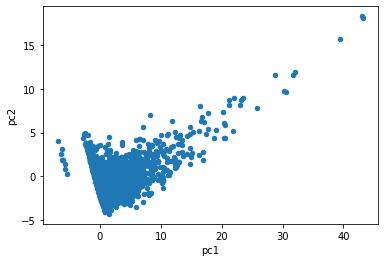

In [154]:
seed = 28
pca = PCA(n_components=2, random_state=seed)
principal_components = pca.fit_transform(standardized_numeric_features)
principal_df = pd.DataFrame(data=principal_components, columns = ['pc1', 'pc2'])
principal_df.plot.scatter(x='pc1', y='pc2')

In [155]:
# With just 2 out of the 7 numeric variables, we capture 73% of variance
print(sum(pca.explained_variance_ratio_))

0.7297733827195095


# PCA with unlimited number of components on numeric features

In [160]:
# Not limiting the number of components, just specifying the amount of variance I want
variance_explained = .9

standardized_numeric_features = StandardScaler().fit_transform(numeric_features_df)
seed = 28
pca = PCA(variance_explained, random_state=seed)
principal_components = pca.fit_transform(standardized_numeric_features)

In [161]:
# Just 4 variables can replace the 7 numeric ones and help us retain 90 % of variance
pca.n_components_

4

# Try MCA for Categorical Features

Docs:  
https://github.com/MaxHalford/prince#multiple-correspondence-analysis-mca  
https://stackoverflow.com/questions/48521740/using-mca-package-in-python  
https://en.wikipedia.org/wiki/Multiple_correspondence_analysis

In [134]:
# Extracting just the categorical features
cols = list(features_df.columns)
categorigal_features_df = features_df[cols[7:]]
categorigal_features_df.head(3)

,categories_Abstract Strategy,categories_Action / Dexterity,categories_Adventure,categories_Age of Reason,categories_American Civil War,categories_American Indian Wars,categories_American Revolutionary War,categories_American West,categories_Ancient,categories_Animals,...,mechanics_Turn Order: Stat-Based,mechanics_Variable Phase Order,mechanics_Variable Player Powers,mechanics_Variable Setup,mechanics_Victory Points as a Resource,mechanics_Voting,mechanics_Worker Placement,mechanics_Worker Placement with Dice Workers,"mechanics_Worker Placement, Different Worker Types",mechanics_Zone of Control
0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [136]:
mca = prince.MCA(n_components=2, n_iter=3,copy=True, check_input=True,engine='auto', random_state=42)
mca = mca.fit(categorigal_features_df)

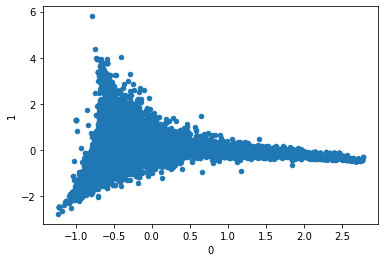

In [140]:
mca.transform(categorigal_features_df).plot.scatter(x=0, y=1)

ZeroDivisionError: float division by zero

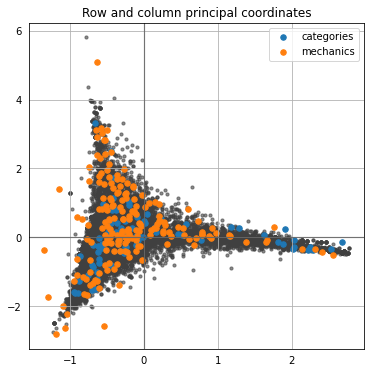

In [141]:
mca = prince.MCA(n_components=2, n_iter=3,copy=True, check_input=True,engine='auto', random_state=42)
mca = mca.fit(categorigal_features_df)

ax = mca.plot_coordinates(
X=categorigal_features_df,
ax=None,
figsize=(6, 6),
show_row_points=True,
row_points_size=10,
show_row_labels=False,
show_column_points=True,
column_points_size=30,
show_column_labels=False,
legend_n_cols=1
)

It produced a funky image, but I don't think this is useful;  
The documentation shows data in a different format:  
    Color   Size   Action    Age Inflated  
0  YELLOW  SMALL  STRETCH  ADULT        T  
1  YELLOW  SMALL  STRETCH  CHILD        F  
2  YELLOW  SMALL      DIP  ADULT        F  
3  YELLOW  SMALL      DIP  CHILD        F  
4  YELLOW  LARGE  STRETCH  ADULT        T  

# KMeans Clustering

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [166]:
features_df = df.drop(['id','name','stats', 'image', 'thumbnail', 'artists', 'publishers', 'designers', 'description', 'categories', 'mechanics'], axis=1)

In [167]:
# Reminder - this is the feature data
features_df.head(3)

,year,min_age,categories_Abstract Strategy,categories_Action / Dexterity,categories_Adventure,categories_Age of Reason,categories_American Civil War,categories_American Indian Wars,categories_American Revolutionary War,categories_American West,...,mechanics_Worker Placement,mechanics_Worker Placement with Dice Workers,"mechanics_Worker Placement, Different Worker Types",mechanics_Zone of Control,number_of_user_ratings,average_user_rating,number_of_user_weight_ratings,average_user_weight_rating,bayes_average,number_of_users_own
0,2017,12,0,0,1,0,0,0,0,0,...,0,0,0,0,34855,8.83110,1497,3.8270,8.57594,56031
1,2015,13,0,0,0,0,0,0,0,0,...,0,0,0,0,36949,8.62291,1034,2.8288,8.47129,58562
2,2015,14,0,0,0,0,0,0,0,0,...,0,0,0,0,19929,8.46877,980,4.3969,8.22085,23599


In [168]:
features_df.year.unique()

array([ 2017,  2015,  2016,  2005,  2012,  2018,  2011,  2013,  2002,
        2007,  2014,  2004,  2006,  2008,  2019,  2010,  1995,  2009,
        1981,  1997,  1876,  1999,  1991, -2200,  2000,  1993,  2003,
        1986,  1996,  1998,  1992,  1964,  1985,  1979,  1982,  1980,
        1994,  2001,  1990,  1475,  1983,  1989,  1977,  1959,  1908,
        1630,  1800,  1850,  1984,  1988,  1810,  1987,  1971,  1978,
         762,  1587, -3000,  1974,  1973,  1962,     0,  1848,  1938,
        1903,  1947,  1948,  1960,  1895,  1976,  1967,  1745,  1930,
        1972,  1906,  1864,  1970,  1946,  1975,  1966,  1965,  1883,
         400,  1969,  1701,  1942,  1430,  1600,  1939,  1963,  1904,
        1932,  1909,  1780,  2020,   700,  1663,  1956,  1951,  1715,
        1885,  1955,  1425,   550,  1860,  1958,  1680,  1796,  1830,
        1889,  1890, -3500,  1887,  1954,  1968,  1881,  1700,  1802,
        1911,  1949,  1950,  1913,  1937,  1742,  1961,  1915,  1534,
        1000,  1900,

In [203]:
# first I need to standardize my data!
standardized_features = StandardScaler().fit_transform(features_df)
standardized_features[0][:10]

array([ 0.15391623,  0.64253577, -0.27543669, -0.19967575,  4.16548019,
       -0.09612928, -0.11204787, -0.04654644, -0.06392232, -0.10638421])

In [178]:
from matplotlib import pyplot as plt

from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score

In [175]:
# CONFIGURATIONS
seed = 28
kmax = 30

# To capture performance metrics for assessing optimal number of clusters
silhouette = []
inertia = []

# To capture model objects for each k
models = {}

# Upper bound for range of k to try 

for k in range(2, kmax):  
    # Create model object
    model = KMeans(n_clusters=k, random_state=seed)
    
    # Train model object
    model.fit(standardized_features)
    
    # Get inertia calculated for trained model 
    inertia.append(model.inertia_)
    
    # Calculate silhouette score of trained model
    silhouette.append(silhouette_score(standardized_features, model.labels_))
    
    # Capture trained model object 
    models[k] = model
    
    print(f'Done with {k}')


Done with 2
Done with 3
Done with 4
Done with 5
Done with 6
Done with 7
Done with 8
Done with 9
Done with 10
Done with 11
Done with 12
Done with 13
Done with 14
Done with 15
Done with 16
Done with 17
Done with 18
Done with 19
Done with 20
Done with 21
Done with 22
Done with 23
Done with 24
Done with 25
Done with 26
Done with 27
Done with 28
Done with 29


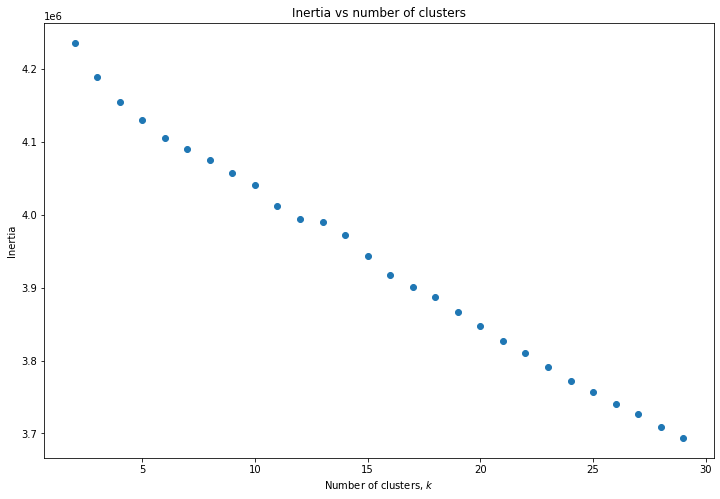

In [179]:
# Scree Plot
fig, ax = plt.subplots(figsize=(12,8));
ax.scatter(range(2,kmax), inertia);
ax.set_xlabel('Number of clusters, $k$');
ax.set_ylabel('Inertia');
ax.set_title('Inertia vs number of clusters');

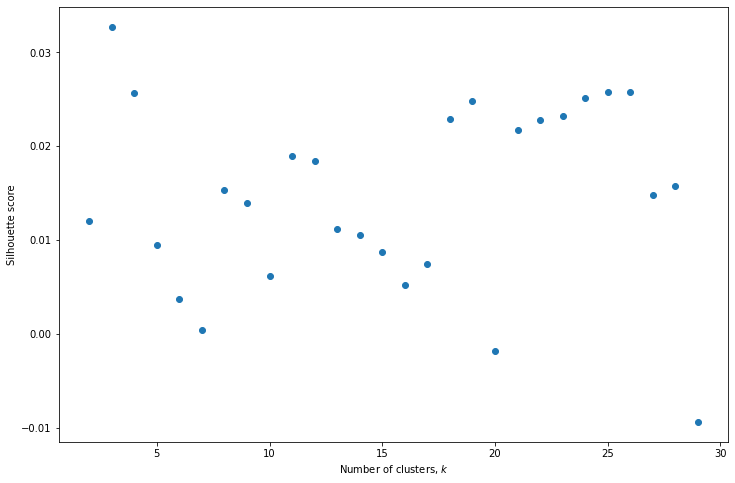

In [181]:
fig, ax = plt.subplots(figsize=(12,8));
ax.scatter(range(2,kmax), silhouette);
ax.set_xlabel('Number of clusters, $k$');
ax.set_ylabel('Silhouette score');

### Note that the scor eis very low to 0, which means many overlapping clusters. So, 30 clusters with KMeans, is probably not enough

In [235]:
high_k = 200
seed = 28

# Create model object
model_200 = KMeans(n_clusters=high_k, random_state=seed)

# Train model object
model_200.fit(standardized_features)

KMeans(n_clusters=200, random_state=28)

In [236]:
high_k_silhouette = silhouette_score(standardized_features, model_200.labels_)
high_k_silhouette

0.10388412086348667

In [237]:
model_200.inertia_

1680670.9555778294

### It looks like I should look for much larger k

In [238]:
# CONFIGURATIONS
seed = 28
kmax = 1000

# To capture performance metrics for assessing optimal number of clusters
silhouette = []
inertia = []

# To capture model objects for each k
models = {}

# Upper bound for range of k to try 
# Will check 100, 200, 300, ..., 1000 clusters
for k in range(100, kmax, 100):  
    # Create model object
    model = KMeans(n_clusters=k, random_state=seed)
    
    # Train model object
    model.fit(standardized_features)
    
    # Get inertia calculated for trained model 
    inertia.append(model.inertia_)
    
    # Calculate silhouette score of trained model
    silhouette.append(silhouette_score(standardized_features, model.labels_))
    
    # Capture trained model object 
    models[k] = model
    
    print(f'Done with {k}')


Done with 100
Done with 200
Done with 300
Done with 400
Done with 500
Done with 600
Done with 700
Done with 800
Done with 900


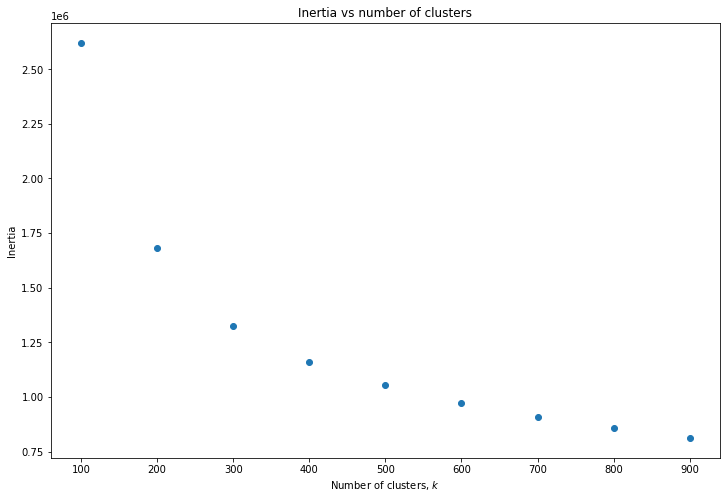

In [240]:
# Scree Plot
fig, ax = plt.subplots(figsize=(12,8));
ax.scatter(range(100, kmax, 100), inertia);
ax.set_xlabel('Number of clusters, $k$');
ax.set_ylabel('Inertia');
ax.set_title('Inertia vs number of clusters');

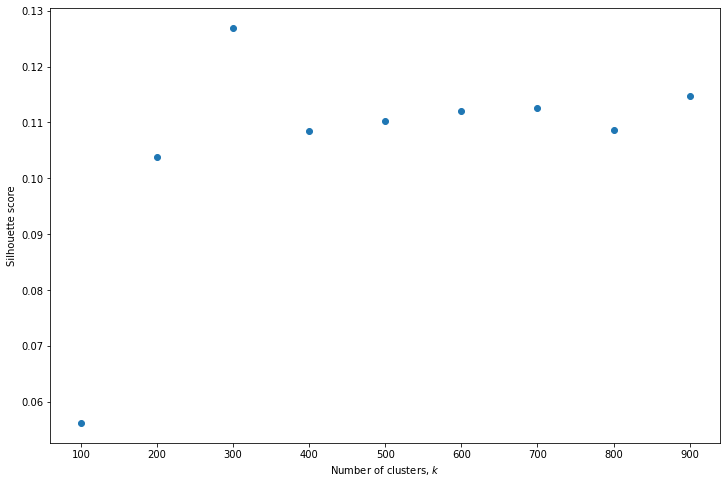

In [241]:
fig, ax = plt.subplots(figsize=(12,8));
ax.scatter(range(100, kmax, 100), silhouette);
ax.set_xlabel('Number of clusters, $k$');
ax.set_ylabel('Silhouette score');

### The model Silhouette scores are not great, nor are the inertia values, but from both graphs it is clear that I don't need more than 300 clusters


<h2 id="Assess-ability-to-train-in-real-time">Assess ability to train in real-time (Note this was done for the small k's from 2 to 30, Will redo for the large ones)<a class="anchor-link" href="#Assess-ability-to-train-in-real-time">¶</a></h2>


In [183]:
# All the number of clusters seem equally "bad"
k_chosen = 10

In [184]:
model = KMeans(n_clusters=k_chosen, random_state=seed)

%timeit model.fit(standardized_features)

1.87 s ± 54 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Not too bad, but a bit slow

### Try for a large k

In [242]:
k_chosen = 250

In [243]:
model = KMeans(n_clusters=k_chosen, random_state=seed)

%timeit model.fit(standardized_features)

21.2 s ± 2 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Not too bad; definitely much slower with more clusters (250) than with ~10 clusters

# Look At Model Predictions

In [186]:
models[k_chosen].predict(standardized_features)

array([8, 8, 8, ..., 2, 9, 9], dtype=int32)

In [190]:
# Timing how long it takes to make a prediction for a single observation
%timeit models[k_chosen].predict(standardized_features[0].reshape(1,-1))

130 µs ± 1.24 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)



<div class="alert alert-warning">Note: add testing for input shape to predictor. If only a single observation is to be scored, need to reshape.  </div>


# Gaussian Mixture Modelling

https://scikit-learn.org/stable/modules/mixture.html

Scrapping this due to time constraints, can look at it later

# Agglomerative Clustering?

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

In [205]:
# Want to visualize clustering with Dendrogram
from scipy.cluster.hierarchy import dendrogram

In [ ]:
# Default Distance metric is 'Euclidean'; Since that doesn't make much sense for the many categorical one-hot encoded variables I have, I will try L1, Manhattan, and cosine 
# (I'm not sure what the difference between L1 & Manhattan is; I thought they were the same, but the scikit learn docs give both options)
# Default linkage is Ward: ward minimizes the variance of the clusters being merged. This is not available for non-euclidean measures of distance so I will use average instead

## Cosine Similarity w/ Average Linkage

In [ ]:
# CONFIGURATION
distance_threshold=0.7

In [213]:
agg_clust = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='cosine', linkage='average').fit(standardized_features)

In [214]:
# Note there is an error/bug in this function when used with Agglomerative Clustering; if the distance_threshold is not specified, it won't produce a dendrogram.
# https://github.com/scikit-learn/scikit-learn/issues/16701
# If it is specified, however, then the n_clusters can't be specified.
# All this means that I can only draw a dendrogram without setting n_clusters, which is ok.

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

Wow

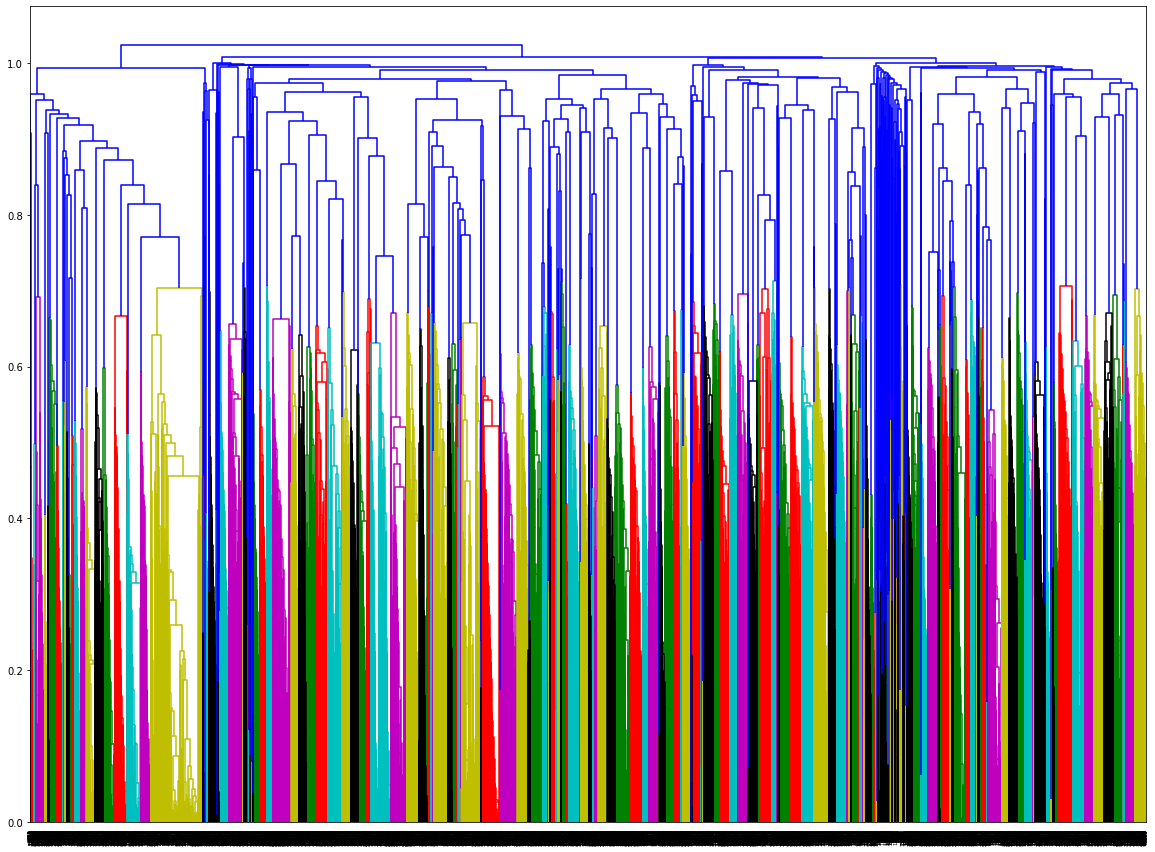

In [218]:
# Create the figure and set it's size.
fig = plt.figure(figsize=(20,15))

plot_dendrogram(agg_clust)

🧐   A fine piece of art. The MET or the Guggenheim, I wonder 🤔

In [219]:
fig.savefig('dendrogram_cosine_average.png')

In [220]:
# Probably shows number of data points because I didn't give n_clusters as an argument
agg_clust.n_clusters_

15727

In [223]:
agg_clust.labels_

array([12089, 11426, 10834, ...,     5,     2,     0])

## Try distance_threshold = .7 as that seems like a good place to "chop off" the tree

In [221]:
agg_clust_dist_point7 = AgglomerativeClustering(distance_threshold=0.7, n_clusters=None, affinity='cosine', linkage='average').fit(standardized_features)

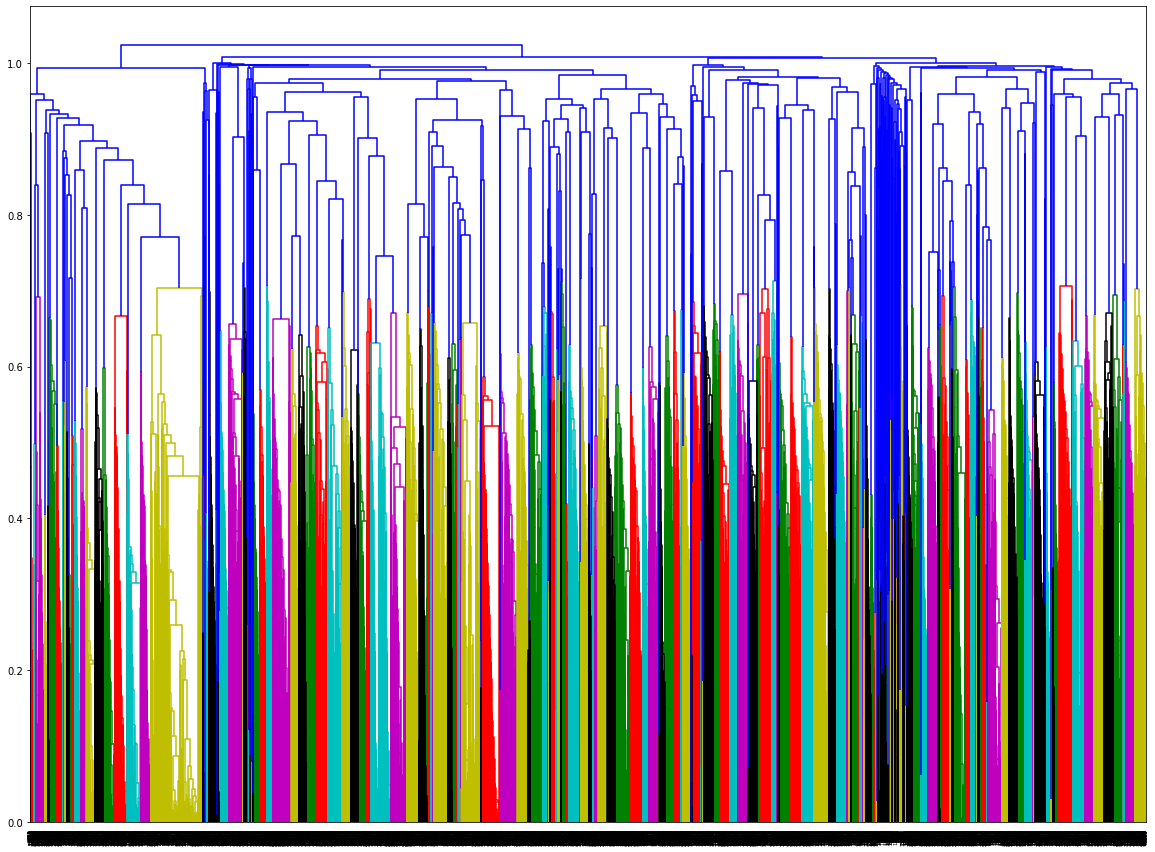

In [222]:
# Create the figure and set it's size.
fig = plt.figure(figsize=(20,15))

plot_dendrogram(agg_clust_dist_point7)

In [224]:
agg_clust_dist_point7.labels_

array([135,  95, 143, ..., 158,  79,  79])

In [227]:
agg_clust_dist_point7.n_clusters_

285

This is a considerable result! In essence, I am able to cluster boardgames into 285 categories.  
This might still seem like a very large number, however, consider the number of possible combinations of the ~250 binary categories & mechanics categories.  
It would be something like 2^250, which is a mind-boggling number.

# Try Distance_threshold = .4 --> Turns out we get many clusters --> 2713

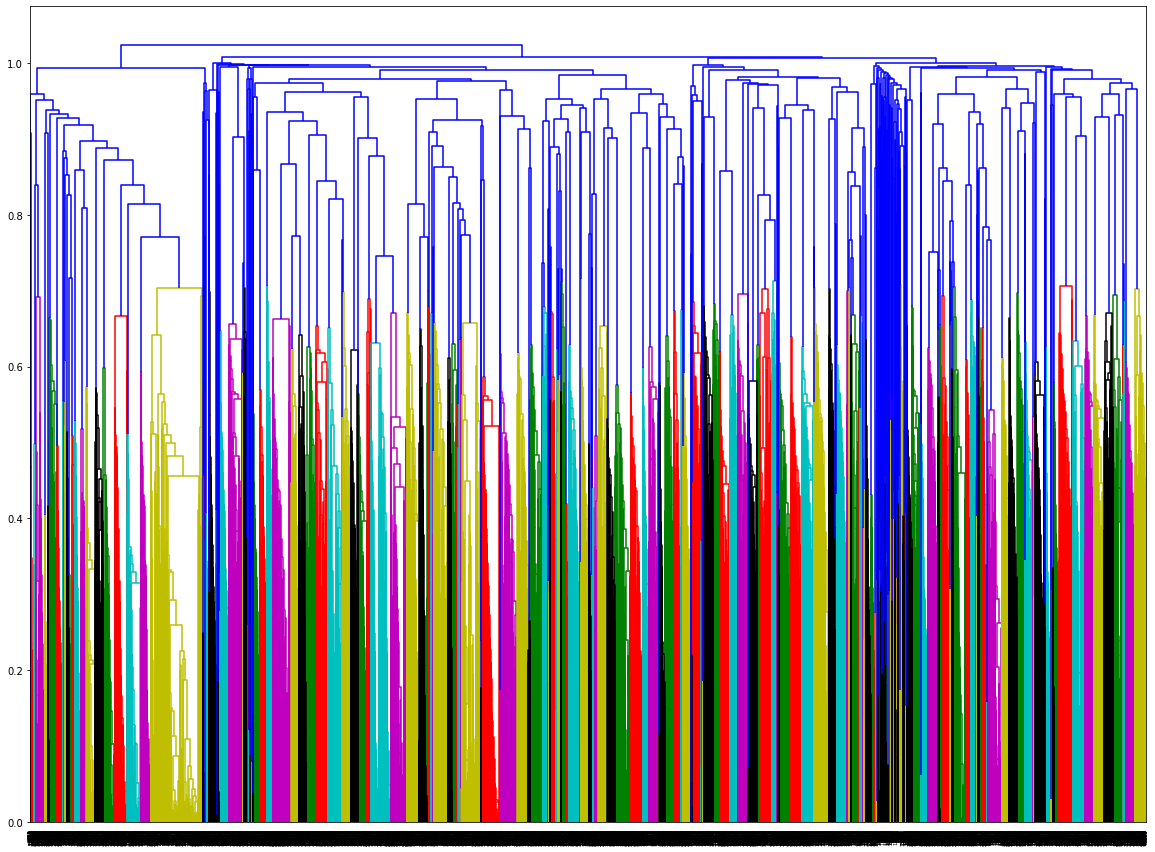

In [228]:
agg_clust_dist_point4 = AgglomerativeClustering(distance_threshold=0.4, n_clusters=None, affinity='cosine', linkage='average').fit(standardized_features)

# Create the figure and set it's size.
fig = plt.figure(figsize=(20,15))

plot_dendrogram(agg_clust_dist_point4)

In [229]:
agg_clust_dist_point4.n_clusters_

2713

# Evaluating the Agglomerative Clustering

In [232]:
# This is the feature data i.e. the X
standardized_features.shape

(15727, 273)

In [233]:
# These are the cluster assignments i.e. the y
agg_clust_dist_point7.labels_

array([135,  95, 143, ..., 158,  79,  79])

In [234]:
# Number of clusters
agg_clust_dist_point7.n_clusters_

285

In [244]:
# Silhouette score for this specific number of clusters
silhouette_score(standardized_features, agg_clust_dist_point7.labels_)

0.08386801009996993

### Time to train a bunch of these so I can decide what number of clusters I should use

In [246]:
# CONFIGURATIONS
seed = 28 # Seed is irrelevant here, because AgglomerativeClsutering doesn't accept a random_state parameter (it is deterministic)
n_cluster_max = 1000 # Upper bound for range of n_clusters to try 

# To capture performance metrics for assessing optimal number of clusters
silhouette = []
inertia = []

# To capture model objects for each k
models = {}

# Will check 100, 200, 300, ..., 1000 clusters
for n_clusters in range(100, n_cluster_max, 100):  
    # Create model object
    model = AgglomerativeClustering(n_clusters=n_clusters, affinity='cosine', linkage='average')
    
    # Train model object
    model.fit(standardized_features)
    
    # Agglomerative Clustering has no inertia
#     inertia.append(model.inertia_)
    
    # Calculate silhouette score of trained model
    silhouette.append(silhouette_score(standardized_features, model.labels_))
    
    # Capture trained model object 
    models[k] = model
    
    print(f'Done with {n_clusters}')

Done with 100
Done with 200
Done with 300
Done with 400
Done with 500
Done with 600
Done with 700
Done with 800
Done with 900


Just as the documentation warns, it appears Agglomerative Clustering is much slower than KMeans.  
Also, the Silhouette coefficient appears to be lower for the corresponding number of clusters

## Silhouette Coefficient

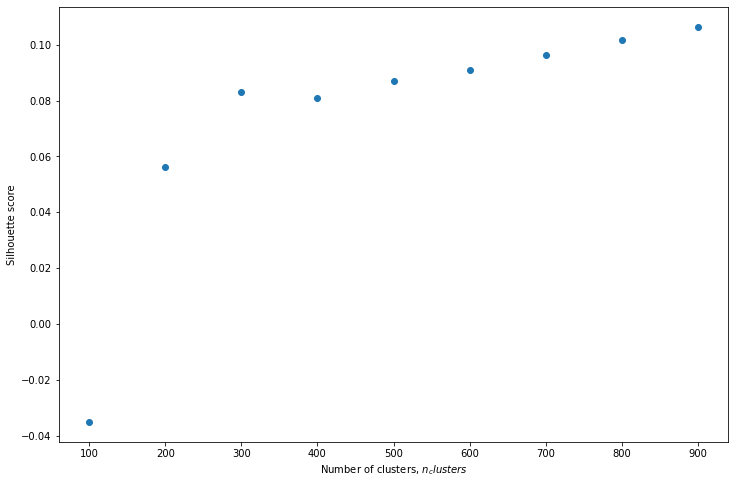

In [247]:
fig, ax = plt.subplots(figsize=(12,8));
ax.scatter(range(100, n_cluster_max, 100), silhouette);
ax.set_xlabel('Number of clusters, $n_clusters$');
ax.set_ylabel('Silhouette score');

# KNN

https://scikit-learn.org/stable/modules/neighbors.html

In [200]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
nbrs = NearestNeighbors(n_neighbors=2).fit(standardized_features)
distances, indices = nbrs.kneighbors(standardized_features)
indices

array([[    0, 10918],
       [    1,    30],
       [    2,    34],
       ...,
       [15724, 15720],
       [15725, 15384],
       [15726, 15033]])

## I don't really see what the similarity is between the below two games

In [196]:
df.loc[10918:10918]

,id,name,stats,image,thumbnail,artists,designers,year,description,categories,...,mechanics_Worker Placement,mechanics_Worker Placement with Dice Workers,"mechanics_Worker Placement, Different Worker Types",mechanics_Zone of Control,number_of_user_ratings,average_user_rating,number_of_user_weight_ratings,average_user_weight_rating,bayes_average,number_of_users_own
10918,257674,Vampire: The Masquerade – Heritage,"{'usersrated': 52, 'average': 7.30513, 'bayesa...",https://cf.geekdo-images.com/original/img/6Npg...,https://cf.geekdo-images.com/thumb/img/_P86h1X...,[Lukas Siegmon],[Babis Giannios],2020,"In Vampire: The Masquerade – Heritage, you pla...","[Fantasy, Horror]",...,0,0,0,0,52,7.30513,1,2.0,5.54282,68


In [201]:
df.loc[0:0]

,id,name,stats,image,thumbnail,artists,designers,year,description,categories,...,mechanics_Worker Placement,mechanics_Worker Placement with Dice Workers,"mechanics_Worker Placement, Different Worker Types",mechanics_Zone of Control,number_of_user_ratings,average_user_rating,number_of_user_weight_ratings,average_user_weight_rating,bayes_average,number_of_users_own
0,174430,Gloomhaven,"{'usersrated': 34855, 'average': 8.8311, 'baye...",https://cf.geekdo-images.com/original/img/lDN3...,https://cf.geekdo-images.com/thumb/img/e7GyV4P...,"[Alexandr Elichev, Josh T. McDowell, Alvaro Ne...",[Isaac Childres],2017,Gloomhaven is a game of Euro-inspired tactica...,"[Adventure, Exploration, Fantasy, Fighting, Mi...",...,0,0,0,0,34855,8.8311,1497,3.827,8.57594,56031


# Below, we see that two ancient games were categorized together!

In [198]:
df.loc[15033:15033]

,id,name,stats,image,thumbnail,artists,designers,year,description,categories,...,mechanics_Worker Placement,mechanics_Worker Placement with Dice Workers,"mechanics_Worker Placement, Different Worker Types",mechanics_Zone of Control,number_of_user_ratings,average_user_rating,number_of_user_weight_ratings,average_user_weight_rating,bayes_average,number_of_users_own
15033,19915,Three Men's Morris,"{'usersrated': 53, 'average': 4.23226, 'bayesa...",https://cf.geekdo-images.com/original/img/4e6c...,https://cf.geekdo-images.com/thumb/img/76njHOw...,[],[(Uncredited)],-1400,This ancient game is probably a direct ancesto...,[Abstract Strategy],...,0,0,0,0,53,4.23226,8,1.25,5.45236,56


In [199]:
df.loc[15726:15726]

,id,name,stats,image,thumbnail,artists,designers,year,description,categories,...,mechanics_Worker Placement,mechanics_Worker Placement with Dice Workers,"mechanics_Worker Placement, Different Worker Types",mechanics_Zone of Control,number_of_user_ratings,average_user_rating,number_of_user_weight_ratings,average_user_weight_rating,bayes_average,number_of_users_own
15726,11901,Tic-Tac-Toe,"{'usersrated': 3030, 'average': 2.66227, 'baye...",https://cf.geekdo-images.com/original/img/htPc...,https://cf.geekdo-images.com/thumb/img/Aes1kM4...,[],[(Uncredited)],-1300,A very old game where each player attempts to ...,"[Abstract Strategy, Children's Game]",...,0,0,0,0,3030,2.66227,348,1.1552,3.53015,1269


# Conclusion

Will use KMeans, because it's faster and has slightly higher silhouette score

Future avenue of exploration is the usefulness of KMeans and Gaussian Mixture Modelling